In [ ]:
def Thomas(n,a, b, c, d, phi):

    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)
    c_prime[0] = c[0]/b[0]
    d_prime[0] = d[0]/b[0]
    for i in range(1, n):
        d_prime[i] = (d[i]-a[i-1]*d_prime[i-1])/(b[i]-a[i-1]*c_prime[i-1])
        if i < n-1:
            c_prime[i] = c[i-1]/(b[i]-a[i-1]*c_prime[i-1])
    phi[n-1] = d_prime[n-1]
    for i in range(n-2, -1, -1):
        phi[i] = d_prime[i]-c_prime[i]*phi[i+1]
    return phi

In [ ]:
import numpy as np
N = 20
x = np.arange(-1, 1 + 1/N, 1/N)

print(x)

np.shape(x)

[-1.0000000e+00 -9.5000000e-01 -9.0000000e-01 -8.5000000e-01
 -8.0000000e-01 -7.5000000e-01 -7.0000000e-01 -6.5000000e-01
 -6.0000000e-01 -5.5000000e-01 -5.0000000e-01 -4.5000000e-01
 -4.0000000e-01 -3.5000000e-01 -3.0000000e-01 -2.5000000e-01
 -2.0000000e-01 -1.5000000e-01 -1.0000000e-01 -5.0000000e-02
  8.8817842e-16  5.0000000e-02  1.0000000e-01  1.5000000e-01
  2.0000000e-01  2.5000000e-01  3.0000000e-01  3.5000000e-01
  4.0000000e-01  4.5000000e-01  5.0000000e-01  5.5000000e-01
  6.0000000e-01  6.5000000e-01  7.0000000e-01  7.5000000e-01
  8.0000000e-01  8.5000000e-01  9.0000000e-01  9.5000000e-01
  1.0000000e+00]


(41,)

In [ ]:
import math
import numpy as np
import pandas as pd
dt = 0.01
dx = 1/(2*N)
Re = 10
nu = 1/Re
nt = int(1/dt)
print(nt)



100


In [ ]:
# initial condition
import numpy as np
import math
u = np.zeros((2*N+1, nt))
for i in range (N+1):
  u[i][0] = 1
  u[2*N - i][0] = 0
sum = 0
for i in range (2*N+1):
   sum += u[i][0]
print(sum)

20.0


In [ ]:
for j in range (1, nt):
  u[0][j] = 1
  u[2*N][j] = 0

In [ ]:
a = np.empty(2*N-2)
b = np.empty(2*N-1)
c = np.empty(2*N-2)
d = np.empty(2*N-1)
phi = np.empty(2*N-1)
for j in range (1, nt):
  for i in range (1, 2*N):
    b[i-1] = 1 + nu*dt/(dx**2)
    if i < 2*N-1:
     c[i-1] = u[i+1][j-1]*dt/(4*dx) - 0.5*nu*dt/(dx**2)
     a[i-1] = -1*u[i-1][j-1]*dt/(4*dx) - 0.5*nu*dt/(dx**2)


    if i == 1:
      d[0] = u[1][j-1] + (0.5*dt*nu/(dx**2))*(u[2][j-1] - 2*u[1][j-1] + u[0][j-1]) - (-1*u[0][j-1]*dt/(4*dx) - 0.5*nu*dt/(dx**2))*u[0][j]     # at n-1
    elif i == 2*N-1:
      d[2*N-2] = u[2*N-1][j-1] + (0.5*dt*nu/(dx**2))*(u[2*N][j-1] - 2*u[2*N-1][j-1] + u[2*N-2][j-1]) - (u[2*N][j-1]*dt/(4*dx) - 0.5*nu*dt/(dx**2))*u[2*N][j]
    else:
     d[i-1] = u[i][j-1] + (0.5*dt*nu/(dx**2))*(u[i+1][j-1] - 2*u[i][j-1] + u[i-1][j-1])
  phi_th = Thomas(2*N-1,a, b, c, d, phi)

  for i in range (1,2*N):
    u[i][j] = phi_th[i-1]

print(u)


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 9.99999997e-01 ... 9.99674341e-01
  9.99680973e-01 9.99687466e-01]
 [1.00000000e+00 9.99999999e-01 9.99999988e-01 ... 9.99260463e-01
  9.99275520e-01 9.99290260e-01]
 ...
 [0.00000000e+00 2.81929911e-09 5.18850350e-08 ... 1.84982291e-01
  1.86301564e-01 1.87594445e-01]
 [0.00000000e+00 8.67476648e-10 1.66319159e-08 ... 9.38472614e-02
  9.45332570e-02 9.52057132e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


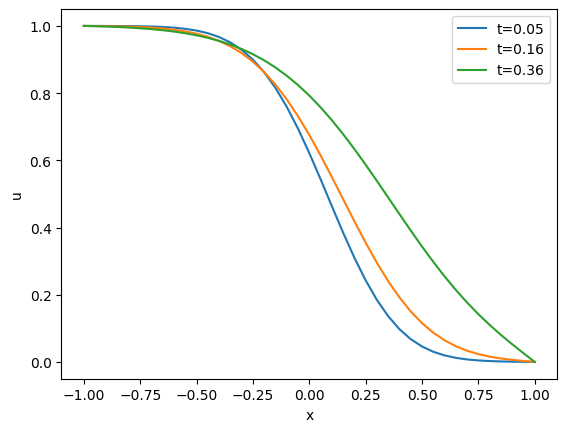

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,  u[:,10])
plt.plot(x, u[:,16])
plt.plot(x, u[:,36])
plt.legend(['t=0.05', 't=0.16', 't=0.36'])
plt.xlabel('x')
plt.ylabel('u')
plt.show()
